<a href="https://colab.research.google.com/github/angnat/JupyterNotebook/blob/main/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convulutional Neural Network and Computer Vision with TensorFlow

#Get the Data
Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

We'll download the pizza_steak subset .zip file and unzip it.

In [1]:
# Get the data
import zipfile

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
with zipfile.ZipFile(file="/content/pizza_steak.zip") as zip_ref:
  zip_ref.extractall()

--2023-12-23 02:52:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.207, 173.194.210.207, 173.194.211.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   148MB/s    in 0.7s    

2023-12-23 02:52:23 (148 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crusial step at beggining the project is Visioning the data

In [2]:
!ls pizza_steak


test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

#Walk through pizza_steak directory and list number of files
for dirpath,dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
#The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec 23 02:52 .
drwxr-xr-x 1 root root 4096 Dec 23 02:52 ..
drwxr-xr-x 4 root root 4096 Dec 23 02:52 test
drwxr-xr-x 4 root root 4096 Dec 23 02:52 train


In [7]:
# Another way to find out how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #show the shape of the image

  return img


['3536023.jpg']
Image shape: (512, 512, 3)


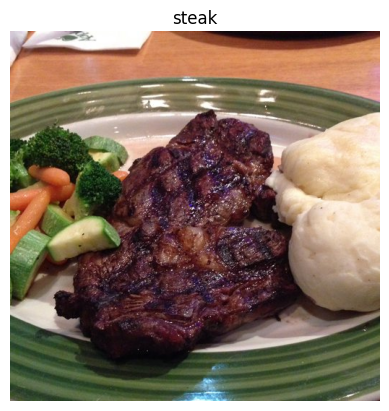

In [10]:
# View random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

In [11]:
img

array([[[214, 201, 211],
        [213, 200, 210],
        [213, 201, 211],
        ...,
        [ 69,  25,  22],
        [ 73,  29,  26],
        [ 76,  32,  29]],

       [[216, 203, 213],
        [215, 202, 212],
        [214, 202, 212],
        ...,
        [ 71,  27,  24],
        [ 70,  25,  22],
        [ 69,  25,  22]],

       [[218, 204, 217],
        [216, 202, 215],
        [214, 202, 214],
        ...,
        [ 73,  28,  23],
        [ 72,  24,  20],
        [ 68,  23,  18]],

       ...,

       [[109, 108,  88],
        [105, 104,  84],
        [100,  99,  81],
        ...,
        [121,  97,  97],
        [118,  92,  91],
        [110,  84,  83]],

       [[127, 124, 107],
        [124, 121, 104],
        [119, 116, 101],
        ...,
        [102,  76,  77],
        [ 95,  67,  66],
        [ 83,  55,  54]],

       [[128, 122, 108],
        [128, 122, 108],
        [125, 121, 109],
        ...,
        [ 76,  50,  51],
        [ 64,  36,  35],
        [ 49,  21,  20]]

In [12]:
img.dtype

dtype('uint8')

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[214, 201, 211],
        [213, 200, 210],
        [213, 201, 211],
        ...,
        [ 69,  25,  22],
        [ 73,  29,  26],
        [ 76,  32,  29]],

       [[216, 203, 213],
        [215, 202, 212],
        [214, 202, 212],
        ...,
        [ 71,  27,  24],
        [ 70,  25,  22],
        [ 69,  25,  22]],

       [[218, 204, 217],
        [216, 202, 215],
        [214, 202, 214],
        ...,
        [ 73,  28,  23],
        [ 72,  24,  20],
        [ 68,  23,  18]],

       ...,

       [[109, 108,  88],
        [105, 104,  84],
        [100,  99,  81],
        ...,
        [121,  97,  97],
        [118,  92,  91],
        [110,  84,  83]],

       [[127, 124, 107],
        [124, 121, 104],
        [119, 116, 101],
        ...,
        [102,  76,  77],
        [ 95,  67,  66],
        [ 83,  55,  54]],

       [[128, 122, 108],
        [128, 122, 108],
        [125, 121, 109],
        ...,
        [ 76,  50,  5

In [14]:
# Get all the pixel values between 0 & 1
img/ 255.

array([[[0.83921569, 0.78823529, 0.82745098],
        [0.83529412, 0.78431373, 0.82352941],
        [0.83529412, 0.78823529, 0.82745098],
        ...,
        [0.27058824, 0.09803922, 0.08627451],
        [0.28627451, 0.11372549, 0.10196078],
        [0.29803922, 0.1254902 , 0.11372549]],

       [[0.84705882, 0.79607843, 0.83529412],
        [0.84313725, 0.79215686, 0.83137255],
        [0.83921569, 0.79215686, 0.83137255],
        ...,
        [0.27843137, 0.10588235, 0.09411765],
        [0.2745098 , 0.09803922, 0.08627451],
        [0.27058824, 0.09803922, 0.08627451]],

       [[0.85490196, 0.8       , 0.85098039],
        [0.84705882, 0.79215686, 0.84313725],
        [0.83921569, 0.79215686, 0.83921569],
        ...,
        [0.28627451, 0.10980392, 0.09019608],
        [0.28235294, 0.09411765, 0.07843137],
        [0.26666667, 0.09019608, 0.07058824]],

       ...,

       [[0.42745098, 0.42352941, 0.34509804],
        [0.41176471, 0.40784314, 0.32941176],
        [0.39215686, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, lebih detailnya kit perlu:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel between 0 & 1 this call scaling or normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Set up paths to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
# Build a CNN model (same as the tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= valid_data,
                        validation_steps=len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 250ms/step - loss: 0.6403 - accuracy: 0.6140 - val_loss: 0.5307 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 7s 138ms/step - loss: 0.4651 - accuracy: 0.7793 - val_loss: 0.3618 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4036 - accuracy: 0.8240 - val_loss: 0.3406 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3857 - accuracy: 0.8253 - val_loss: 0.3514 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3509 - accuracy: 0.8520 - val_loss: 0.3184 - val_accuracy: 0.8540


🔑 kalau Epoch > 10s ETA pakai GPU


In [16]:
len(train_data)

47

In [17]:
#1500 gambar sample dibagi 32 batch, agar memory tidak out of memory
1500/32

46.875

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

Coba Neural Network sebelumnya untuk image

In [19]:
tf.random.set_seed(42)

#Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 109ms/step - loss: 0.7371 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 159ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 157ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602161 (2.30 MB)
Trainable params: 602161 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#set the random seed
tf.random.set_seed(42)

#Create a model
model_3= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

#Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 144ms/step - loss: 5.2000 - accuracy: 0.6153 - val_loss: 0.7282 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 1.1168 - accuracy: 0.6900 - val_loss: 1.7650 - val_accuracy: 0.5620
Epoch 3/5
47/47 [==============================] - 7s 144ms/step - loss: 0.8200 - accuracy: 0.7060 - val_loss: 0.7904 - val_accuracy: 0.7020
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.7902 - accuracy: 0.7273 - val_loss: 0.4887 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.7987 - accuracy: 0.7307 - val_loss: 0.5039 - val_accuracy: 0.7580


In [22]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification :

1. Become one with the data (visualise, visualize, visualize)
2. Preporcess the data (Prepare it for our model, the main step is scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust diffrent parameters and improve the model
7. Repeet until satisfied

1. Become one with the data

['3745515.jpg']
Image shape: (512, 384, 3)
['72716.jpg']
Image shape: (512, 384, 3)


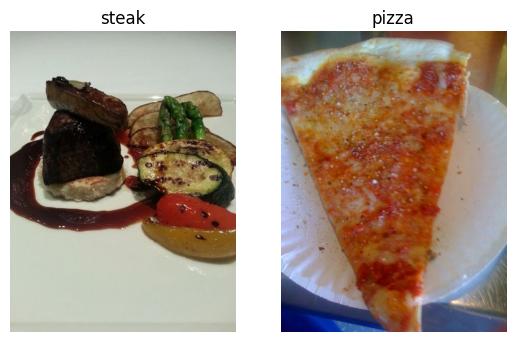

In [23]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/',target_class='steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/',target_class='pizza')

2. Preprocess the data (prepare it for a model)

In [24]:
# Define directory dataset path

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10rb images pada saat yg sama, model hanya melihat 32 gambar pada saat yg bersamaan

Hal ini dikarenakan:
1. 10000 images atau lebih mungkin tidak cukup untuk di proses oleh GPU
2. Try to learn the pattern in 10000 images in one hit, could result in the model not being able to learn very well.

Why 32?

Using in many deep learning library

In [25]:
!nvidia-smi

Sat Dec 23 02:55:00 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0              28W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [26]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [27]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #Target directory from images
                                               target_size=(224,224), # Target size of images
                                               class_mode='binary',
                                               batch_size=32)


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
# Get a sample of train data batch
images, labels = train_data.next() #get the "next" batch of images/labels in training data
len(images), len(labels)

(32, 32)

In [29]:
# How many batches are there?
len(train_data)

47

In [30]:
1500/32

46.875

In [31]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

## 3.Create a CNN Model (start with a baseline)
A baseline is a relatively simple model or exsisting result yg harus di setup pada saat awal model. Model yg kita buat harus mengalahkan baseline nya.
Contohnya Simple CNN : Inputs -> Preprocess Inputs -> Conv Layers + Pooling Layer -> Output

In [32]:
# Make creating of our model little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
# Create the model (this will be our baseline)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid', #if same the output shape is same/ no padding, if valid output shape get compress
           activation='relu',
           input_shape=(224,224,3)), #Input Layer
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid') # Output layer
])

In [34]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [35]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#4. Fit the model

In [36]:
# Check the length of train and test data generator
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 126ms/step - loss: 0.6886 - accuracy: 0.7013 - val_loss: 0.3771 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.3650 - accuracy: 0.8533 - val_loss: 0.5270 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.2152 - accuracy: 0.9333 - val_loss: 0.3500 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.0885 - accuracy: 0.9780 - val_loss: 0.4742 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.0296 - accuracy: 0.9960 - val_loss: 0.4827 - val_accuracy: 0.8300


#5 Evaluate our model
Model nya belajar sesuatu, mari kita evaluasi

<Axes: >

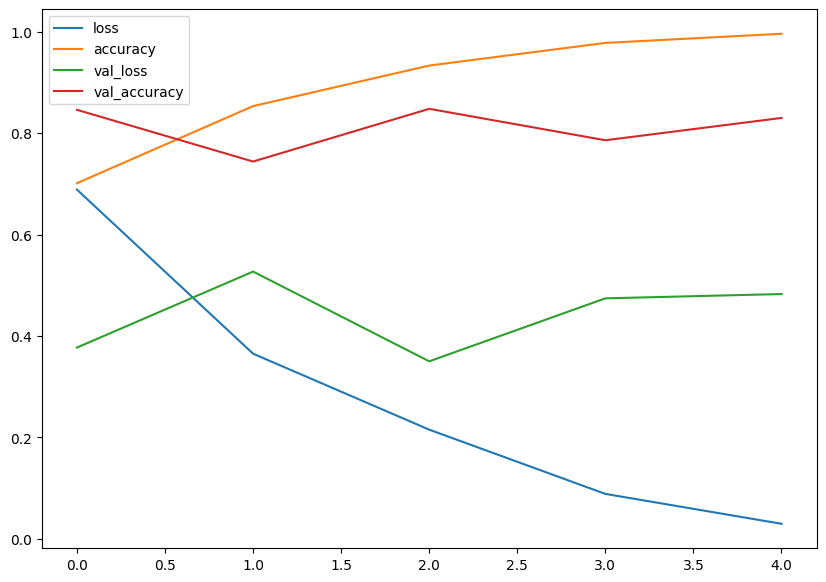

In [38]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [39]:
# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs,loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy, label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

🔑 **Note** Ketika model **validation loss start to increase**, sepertinya model tersebut **Overfitting** Model tersebut mengenal pattern nya terlalu baik, namun dalam men generalize data yg belum diuji menjadi berkurang

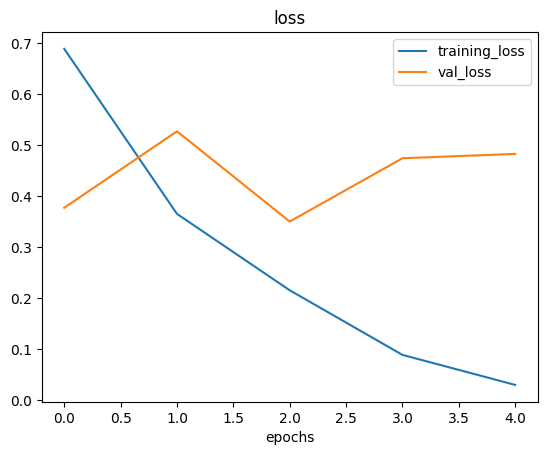

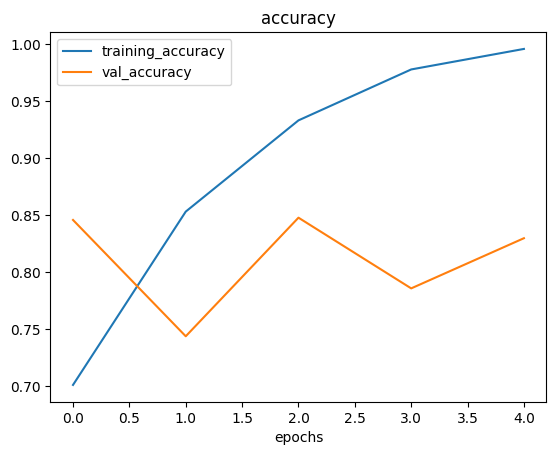

In [40]:
plot_loss_curves(history_4)

#6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
- Increase the number of conv layers
- Increase the number of conv filters
- Add another dense layer to the output of our flattened layer

Reduce overfitting:
- Add data augmentation
- Add regularization layers (such as MaxPool2D)
- Add mode data

In [41]:
# Create the model ()

model_5 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [42]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )

In [43]:
#Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 126ms/step - loss: 0.6587 - accuracy: 0.6187 - val_loss: 0.5286 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4904 - accuracy: 0.7853 - val_loss: 0.3985 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4667 - accuracy: 0.7907 - val_loss: 0.4141 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4261 - accuracy: 0.8133 - val_loss: 0.3973 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4164 - accuracy: 0.8107 - val_loss: 0.3836 - val_accuracy: 0.8300


In [44]:
# Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

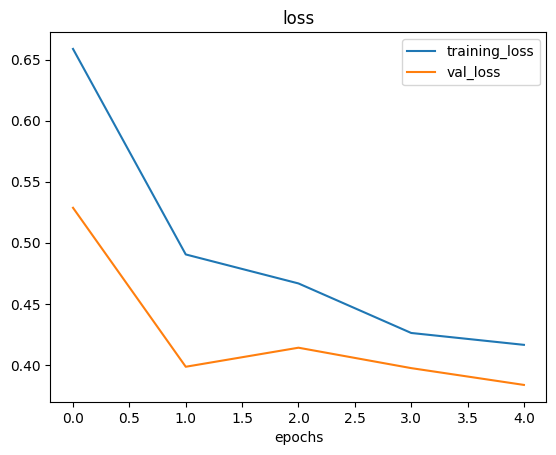

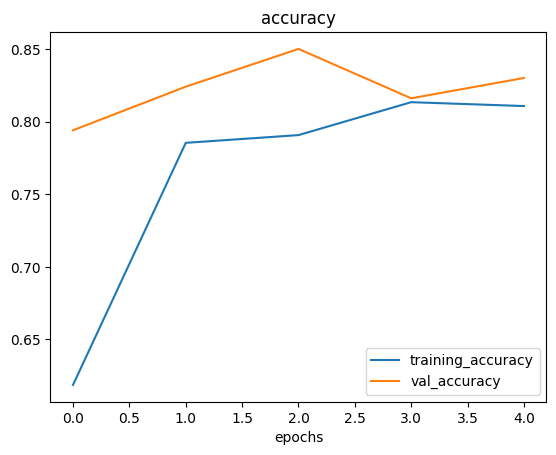

In [45]:
# Plot loss curves
plot_loss_curves(history_5)

Opening our bag of tricks and finding data Augmentation

In [46]:
#Create ImageDataGenerator training
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #how much you want rotate an image
                                             shear_range=0.2, #how much do you want to shear an image
                                             zoom_range=0.2, #zoom in randomly on an image
                                             width_shift_range=0.2, #move image around x axis
                                             height_shift_range=0.3, #move image around y axis
                                             horizontal_flip=True) # do you want to flip image

#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

Image/sampelnya tidak ditambah, namun image yg sama dimodif dengan rotasi,zoom dll

In [47]:
#Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=False)
#Create non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
IMG_SIZE = (224,224)
#Create non-augmented test data batches
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary')


Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


🔑 **Note:** Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [48]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

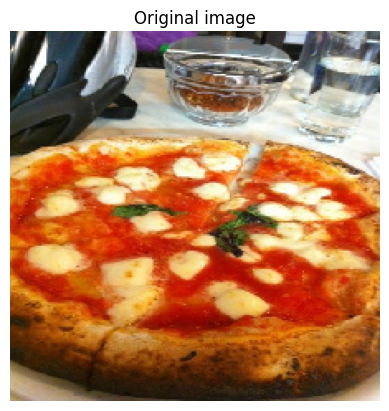

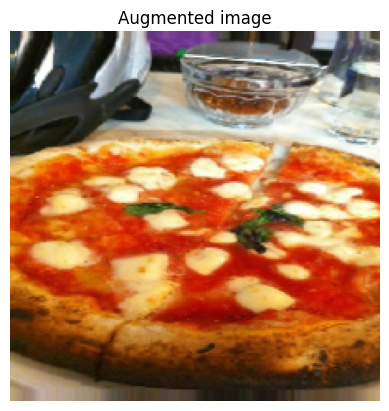

In [49]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [50]:
# Create a model (sama dengan model 5)
model_6 = Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, #Fit model 6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 23s 461ms/step - loss: 0.7027 - accuracy: 0.5133 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6947 - accuracy: 0.5967 - val_loss: 0.6754 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6958 - accuracy: 0.6333 - val_loss: 0.6767 - val_accuracy: 0.5260
Epoch 4/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6903 - accuracy: 0.5367 - val_loss: 0.6767 - val_accuracy: 0.6520
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6939 - accuracy: 0.5647 - val_loss: 0.6609 - val_accuracy: 0.5440


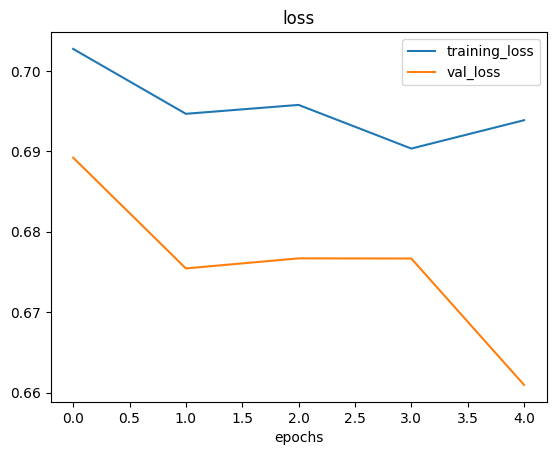

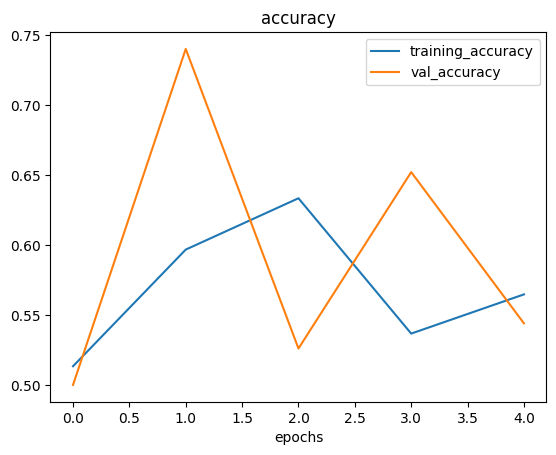

In [51]:
# Check our models training curves
plot_loss_curves(history_6)

In [52]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [53]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )


Epoch 1/5
47/47 [==============================] - 23s 462ms/step - loss: 0.6583 - accuracy: 0.6020 - val_loss: 0.5356 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5981 - accuracy: 0.6913 - val_loss: 0.4599 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 21s 437ms/step - loss: 0.5338 - accuracy: 0.7373 - val_loss: 0.3830 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 22s 457ms/step - loss: 0.5292 - accuracy: 0.7480 - val_loss: 0.3705 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.5090 - accuracy: 0.7540 - val_loss: 0.4007 - val_accuracy: 0.8340


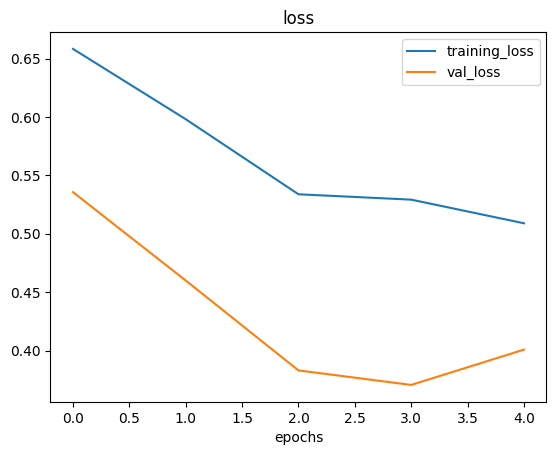

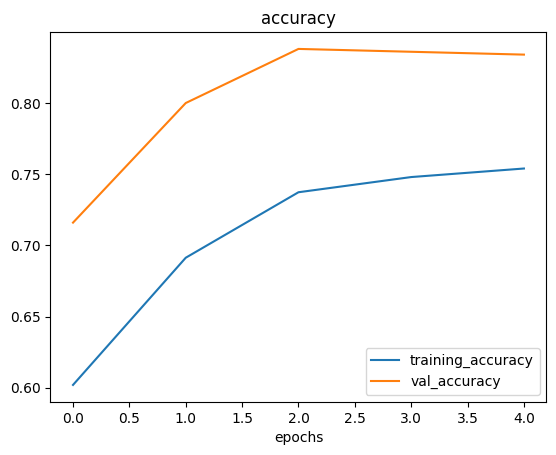

In [54]:
# Check our models training curves
plot_loss_curves(history_7)

###7. Repeat until satified

Since we're already beat the baseline, therea are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g add more Conv2D
* Increase the number of filters in each convolutional layer
* Train for longer (more epoch)
* Find the ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image has learn and adjust

Making a prediction with our trained model on our own custom data

In [55]:
# Classes we're working
print(class_names)

['pizza' 'steak']


--2023-12-23 03:01:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-12-23 03:01:04 (32.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



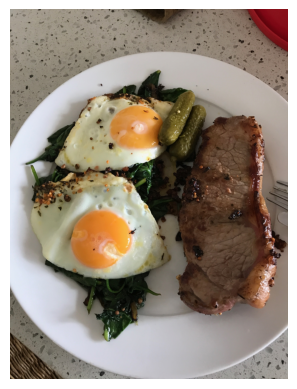

In [56]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [57]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [58]:
# karena parameternya 4 perlu batch size jg sedangkan dimensi array nya cuma 3 maka dim nya perlu di expand
tf.expand_dims(steak, axis=0).shape

TensorShape([1, 4032, 3024, 3])

🔑 **Note** Ketika km melatih neural network dan ingin melatih dengan data sendiri, pastikan data yg baru sesuai dengan model yg di training

In [59]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [60]:
# Create a function to import image and resize it to be able to be use with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Read an image from filename, turns it into tensor and reshape to (img shape)
  """
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape,img_shape])
  #Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [61]:
# Load in and prep our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [62]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 249ms/step


array([[0.9030128]], dtype=float32)

Gambar custom kita sudah diselipkan ke modelnya

In [63]:
#reminder class name
class_names

array(['pizza', 'steak'], dtype='<U5')

In [64]:
# we can index the prediction class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [65]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename,makes a prediction with modeland plots the image with prediced class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


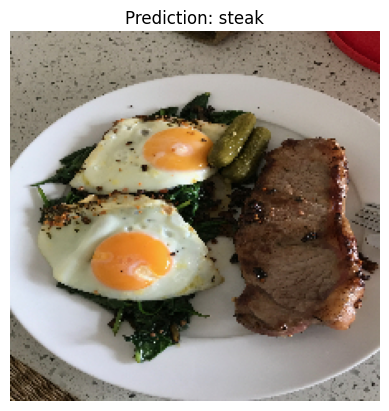

In [66]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try another image, this time pizza

--2023-12-23 03:01:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-12-23 03:01:08 (40.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 19ms/step


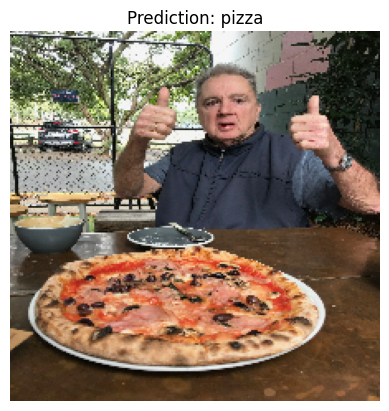

In [67]:
# Download another test custom image and make prediction
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi class Image Classification

We've just been through a bunch of classification problem (pizza vs steak)
Now we're going to predict many food (multiclass classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameter and improve the model to beat the baseline
7. Repeat until satisfied

# 1. Import and become one with the data

In [68]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-23 03:01:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.207, 173.194.212.207, 142.251.162.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   239MB/s    in 2.1s    

2023-12-23 03:01:10 (239 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [69]:
import os

# Walk through 10 classes of food image data
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directory and {len(filenames)} images in '{dirpath}'.")

There are 2 directory and 0 images in '10_food_classes_all_data'.
There are 10 directory and 0 images in '10_food_classes_all_data/train'.
There are 0 directory and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directory and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directory and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directory and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directory and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directory and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directory and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directory and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directory and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directory and 750 images in '10_food_classes_all_data/train/pizza'.
There are 10 directory 

In [70]:
# Setup the train and test directories
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"


In [71]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1878636.jpg']
Image shape: (512, 383, 3)


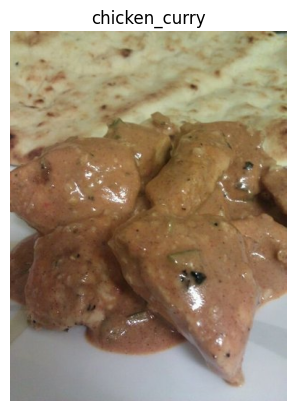

In [72]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [73]:
random.choice(class_names)

'pizza'

##2. Preprocess the Data (prepare it for a Model)


In [74]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [75]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #Target directory from images
                                               target_size=(224,224), # Target size of images
                                               class_mode='categorical',
                                               batch_size=32)


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [76]:
# Create the model (this will be our baseline)
model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)), #Input Layer
    Activation(activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # Output layer, change to 10 Output and use softmax
])

# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [77]:
# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [78]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

## 3. Fit the Model

In [79]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 35s 144ms/step - loss: 2.1688 - accuracy: 0.1893 - val_loss: 2.0529 - val_accuracy: 0.2340
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.9522 - accuracy: 0.3123 - val_loss: 1.9396 - val_accuracy: 0.3184
Epoch 3/5
235/235 [==============================] - 30s 128ms/step - loss: 1.7193 - accuracy: 0.4141 - val_loss: 1.8737 - val_accuracy: 0.3420
Epoch 4/5
235/235 [==============================] - 29s 123ms/step - loss: 1.2852 - accuracy: 0.5699 - val_loss: 1.9740 - val_accuracy: 0.3344
Epoch 5/5
235/235 [==============================] - 31s 133ms/step - loss: 0.6804 - accuracy: 0.7797 - val_loss: 2.6640 - val_accuracy: 0.2996


In [80]:
# 5. Evaluate The model
model_8.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 2.6640 - accuracy: 0.2996


[2.6639745235443115, 0.2996000051498413]

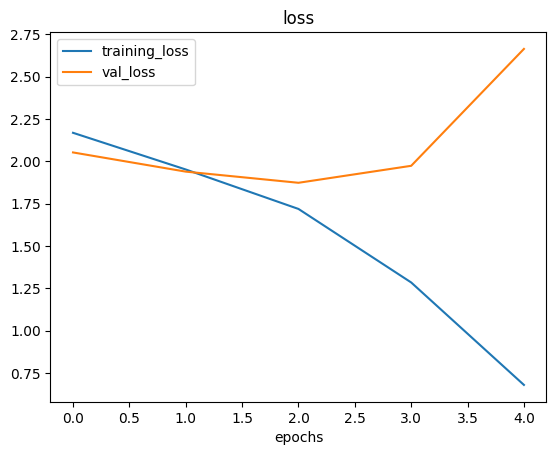

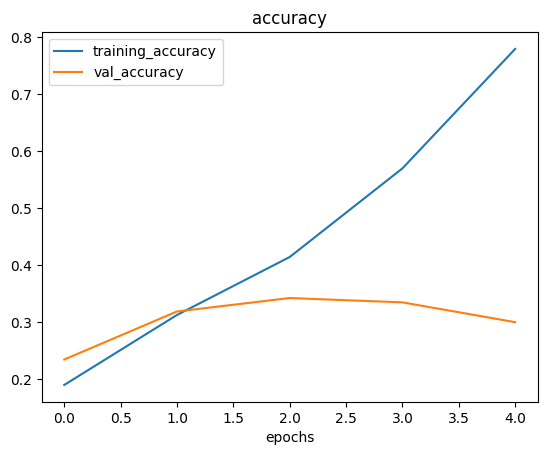

In [81]:
# Check out the model loss
plot_loss_curves(history_8)

What do these loss curves tell us?
It seem our model is **overfitting** the training set quite badly...in other word it the training data but fails to generalize well to unseend data

###6. Adjust the model hyperparameter to reduce overfitting and beat the baseline

So let's fix overfitting by....
* **Get more data** having more data gives a model more opportunity
* **Simplify the model** More data, Data Augmentation,Better data, Use transfer learning
* **Use data augmentation** data augmentation manipulates the training data in such a way to add more diversity to it
* **Use transfer learning** Transfer learning leverage the patterns, another model has learn, use your pattern on your own dataset


In [82]:
# How about we try n simplify the model first?
# Let's try to remove 2 conv layers
model_9 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [83]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [84]:
# Fit the layer
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 29s 118ms/step - loss: 2.0806 - accuracy: 0.2496 - val_loss: 1.9081 - val_accuracy: 0.3244
Epoch 2/5
235/235 [==============================] - 30s 126ms/step - loss: 1.7432 - accuracy: 0.4047 - val_loss: 1.8201 - val_accuracy: 0.3600
Epoch 3/5
235/235 [==============================] - 27s 114ms/step - loss: 1.3924 - accuracy: 0.5423 - val_loss: 1.9061 - val_accuracy: 0.3544
Epoch 4/5
235/235 [==============================] - 31s 134ms/step - loss: 0.8978 - accuracy: 0.7283 - val_loss: 2.1306 - val_accuracy: 0.3212
Epoch 5/5
235/235 [==============================] - 27s 114ms/step - loss: 0.4817 - accuracy: 0.8687 - val_loss: 2.4894 - val_accuracy: 0.3092


In [85]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

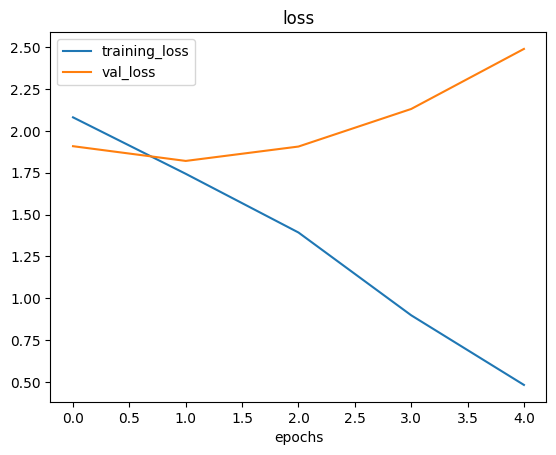

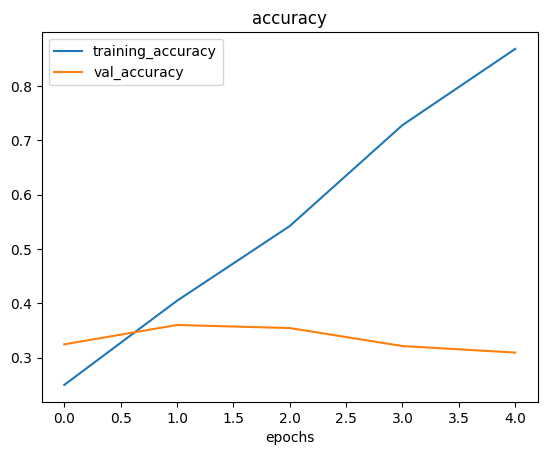

In [86]:
# Check out the model loss
plot_loss_curves(history_9)

Looks like our experiment didn't work. Akurasinya menurun dan overfitting. Mari kita coba data augmentation
Mari kita coba dan improve model nya

Idealnya kita ingin:
* Reduce overfitting (get the train n validation loss curve closer)
* Improve validation acuracy

In [87]:
# Create an augmented data generator
#Create ImageDataGenerator training
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #how much you want rotate an image
                                             zoom_range=0.2, #zoom in randomly on an image
                                             width_shift_range=0.2, #move image around x axis
                                             height_shift_range=0.3, #move image around y axis
                                             horizontal_flip=True) # do you want to flip image


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [88]:
# Let's create another model but this time we'll fit augmented train data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as prev model)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [89]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [90]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 111s 467ms/step - loss: 2.2038 - accuracy: 0.1851 - val_loss: 2.0300 - val_accuracy: 0.2768
Epoch 2/5
235/235 [==============================] - 107s 456ms/step - loss: 2.0767 - accuracy: 0.2629 - val_loss: 1.9385 - val_accuracy: 0.3364
Epoch 3/5
235/235 [==============================] - 110s 465ms/step - loss: 2.0139 - accuracy: 0.3009 - val_loss: 1.8770 - val_accuracy: 0.3648
Epoch 4/5
235/235 [==============================] - 106s 452ms/step - loss: 1.9702 - accuracy: 0.3145 - val_loss: 1.7967 - val_accuracy: 0.3776
Epoch 5/5
235/235 [==============================] - 107s 455ms/step - loss: 1.9456 - accuracy: 0.3215 - val_loss: 1.7953 - val_accuracy: 0.3784


In [91]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 2.6640 - accuracy: 0.2996


[2.6639745235443115, 0.2996000051498413]

In [92]:
model_10.evaluate(test_data)

79/79 [==============================] - 8s 103ms/step - loss: 1.7953 - accuracy: 0.3784


[1.7952746152877808, 0.3783999979496002]

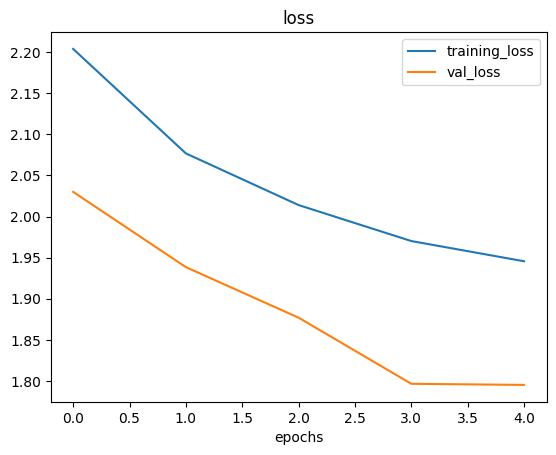

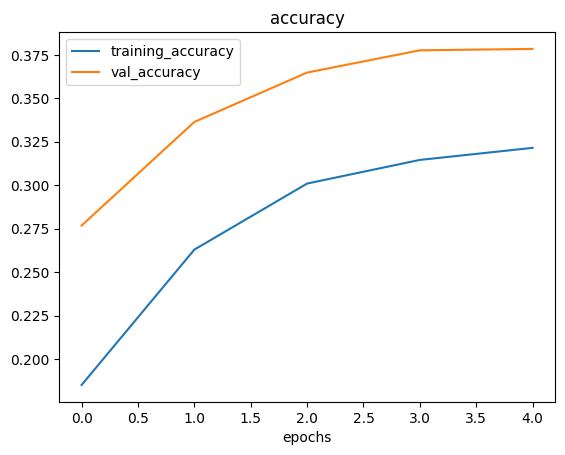

In [93]:
plot_loss_curves(history_10)

Yes thats looks better, kurva nya sudah bergerak ke arah yang benar, mungkin jika epoch nya ditambah bisa lebih baik lagi

### 7. Repeat until satisfied
We could keep going here...continally trying to bring our loss curves closer together n trying to improve the validation/test accuracy

How?

By running lots of experiment,namely:
- restructuring our model's architecture (increasing layers / hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs insteads)
- try **transfer learning**

### Making a prediction w our trained model

Let's use our trained model to make some predictions on our own custom images!

In [94]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [95]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg

--2023-12-23 03:16:47--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15842 (15K) [text/plain]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]  15.47K  --.-KB/s    in 0.01s   

2023-12-23 03:16:47 (1.25 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [15842/15842]

--2023-12-23 03:16:47--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15814 (15K) [text/plain]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]  15.44K  --.-KB/s    in 0.01s   

2023-12-23 03:16:47 (1.23 MB/s) - ‘03-steak.jpeg.1’ saved [15814/15814]



In [103]:
# Reconfig pred and plot function to work with multiclass images
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename,makes a prediction with modeland plots the image with prediced class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 49ms/step


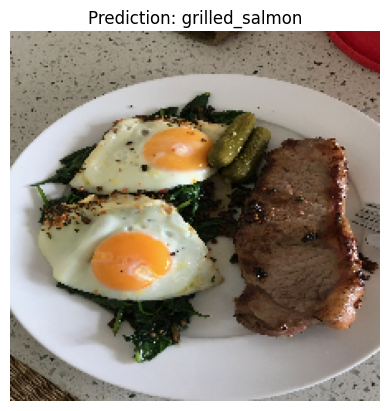

In [111]:
# Make a prediction using model 10
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

Looks like our model didn't perform well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on our unseen data

## Saving and loading our model

In [112]:
# Save a model
model_10.save('saved_trained_model_10')

In [113]:
# Load in a trained model and evaluate it
laoded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
laoded_model_10.evaluate(test_data)

79/79 [==============================] - 7s 92ms/step - loss: 1.7953 - accuracy: 0.3784


[1.7952748537063599, 0.3783999979496002]

In [114]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 7s 90ms/step - loss: 1.7953 - accuracy: 0.3784


[1.7952743768692017, 0.3783999979496002]